EDA of Sephora Dataset

In [ ]:
import pandas as pd

In [ ]:
product_info_path = '/content/product_info.csv'
product_info_df = pd.read_csv(product_info_path)

In [ ]:
# 加载和合并评价数据集
review_files = [
    '/content/reviews_0-250.csv',
    '/content/reviews_1250-end.csv',
    '/content/reviews_250-500.csv',
    '/content/reviews_500-750.csv',
    '/content/reviews_750-1250.csv'
]

In [ ]:
reviews_df = pd.concat([pd.read_csv(file) for file in review_files], ignore_index=True)

<ipython-input-7-0d4ed9c4f3a7>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.concat([pd.read_csv(file) for file in review_files], ignore_index=True)
<ipython-input-7-0d4ed9c4f3a7>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.concat([pd.read_csv(file) for file in review_files], ignore_index=True)
<ipython-input-7-0d4ed9c4f3a7>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.concat([pd.read_csv(file) for file in review_files], ignore_index=True)


In [ ]:
product_info_df.info(), reviews_df.info(), product_info_df.head(), reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

(None,
 None,
   product_id               product_name  brand_id brand_name  loves_count  \
 0    P473671    Fragrance Discovery Set      6342      19-69         6320   
 1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
 2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
 3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
 4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   
 
    rating  reviews            size                      variation_type  \
 0  3.6364     11.0             NaN                                 NaN   
 1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
 2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
 3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
 4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
 
   variation_value  ... online_only out_of_stock  sephora_exclus

Data overview

In [ ]:
reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)

<ipython-input-9-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)
<ipython-input-9-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)
<ipython-input-9-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)


Data Cleaning

Handling missing data

In [ ]:
reviews.drop_duplicates(inplace=True)

In [ ]:
reviews.dropna(inplace=True)

In [ ]:
reviews['price_usd'].fillna(reviews['price_usd'].mean(), inplace=True)

Dealing with inconsistent data

In [ ]:
reviews['submission_time'] = pd.to_datetime(reviews['submission_time'])

In [ ]:
reviews['skin_type'] = reviews['skin_type'].replace({'dryy': 'dry', 'oilyy': 'oily'})

Handling duplicate data

In [ ]:
reviews.drop_duplicates(inplace=True)

Handling irrelevant data

In [ ]:
reviews.drop(columns=['Unnamed: 0'], inplace=True)

Handling outliers

In [ ]:
Q1 = reviews['price_usd'].quantile(0.25)
Q3 = reviews['price_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

reviews = reviews[(reviews['price_usd'] >= lower_bound) & (reviews['price_usd'] <= upper_bound)]

Descriptive statistical analysis

In [ ]:
print(reviews['rating'].describe())

count    294722.000000
mean          4.047455
std           1.382949
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64


EDA 1 Product information analysis
Objective: To analyze product information, including product category distribution, price range

Visualization of data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
product_info = pd.read_csv('/content/product_info.csv')

In [ ]:
print(product_info.describe())
print(product_info.info())

          brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.655595   
std    1709.595957  6.609212e+04     0.516694   1101.982529    53.669234   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    5333.000000  3.758000e+03     3.981725     26.000000    25.000000   
50%    6157.500000  9.880000e+03     4.289350    122.000000    35.000000   
75%    6328.000000  2.684125e+04     4.530525    418.000000    58.000000   
max    8020.000000  1.401068e+06     5.000000  21281.000000  1900.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       451.000000      270.000000      8494.000000  8494.000000   
mean         91.168537       20.207889         0.070285     0.071698   
std          79.195631       24.327352         0.255642     0.258002   
min           0.000000     

In [ ]:
print(product_info.columns)

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')


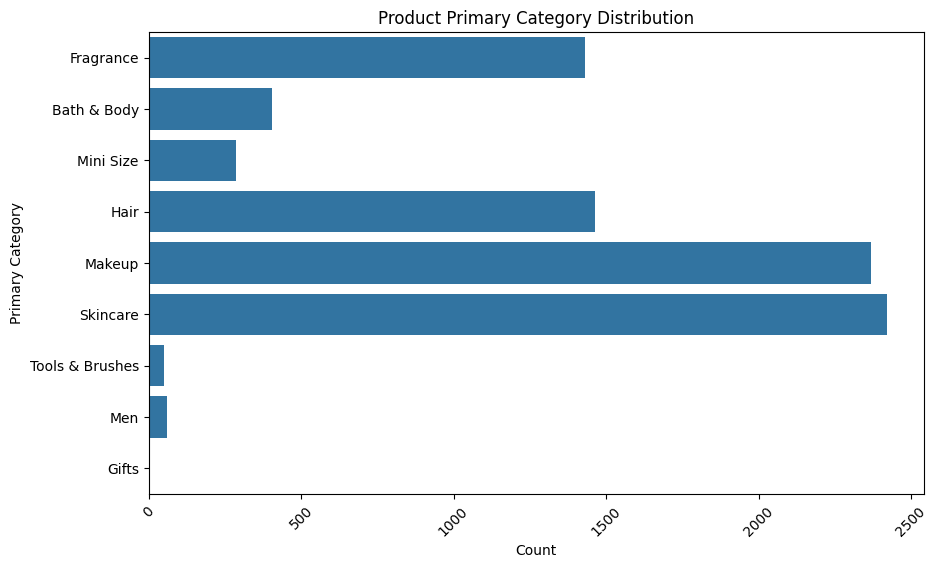

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=product_info, y='primary_category')
plt.title('Product Primary Category Distribution')
plt.xlabel('Count')
plt.ylabel('Primary Category')
plt.xticks(rotation=45)
plt.show()

EDA 2: Review sentiment analysis
Objective: Analyze review data to understand customer satisfaction and emotional disposition

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)

<ipython-input-19-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)
<ipython-input-19-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)
<ipython-input-19-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)


In [ ]:
reviews['review_text'] = reviews['review_text'].fillna('').astype(str)

reviews['polarity'] = reviews['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

Look at the sentiment set distribution

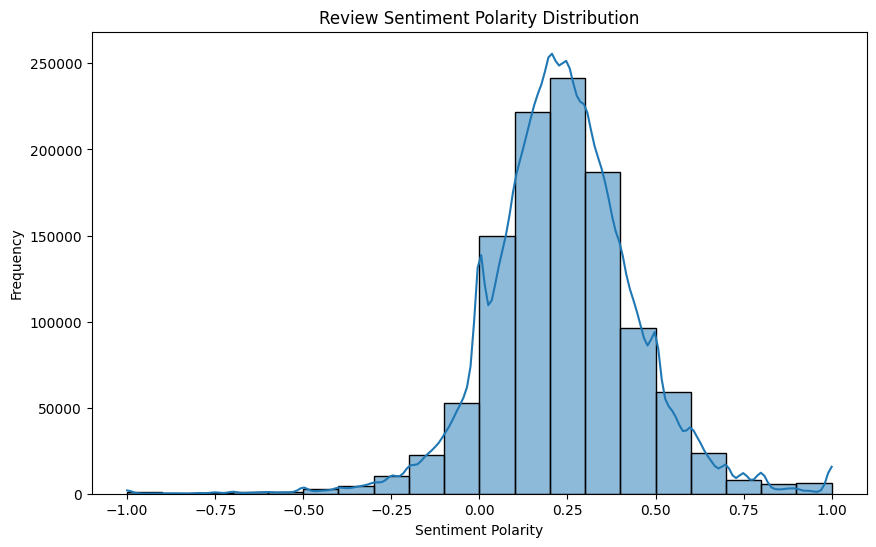

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(reviews['polarity'], bins=20, kde=True)
plt.title('Review Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#The number of positive and negative emotional comments
reviews['sentiment'] = reviews['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
print(reviews['sentiment'].value_counts())

positive    978322
negative     95854
neutral      20235
Name: sentiment, dtype: int64


EDA 3: Scoring trend analysis
Objective: To analyze the trend of review scores over time

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)

<ipython-input-24-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)
<ipython-input-24-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)
<ipython-input-24-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)


In [ ]:
print(reviews.columns)

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')


In [ ]:
reviews['submission_time'] = pd.to_datetime(reviews['submission_time'])

In [ ]:
rating_trend = reviews.groupby(reviews['submission_time'].dt.date)['rating'].mean()


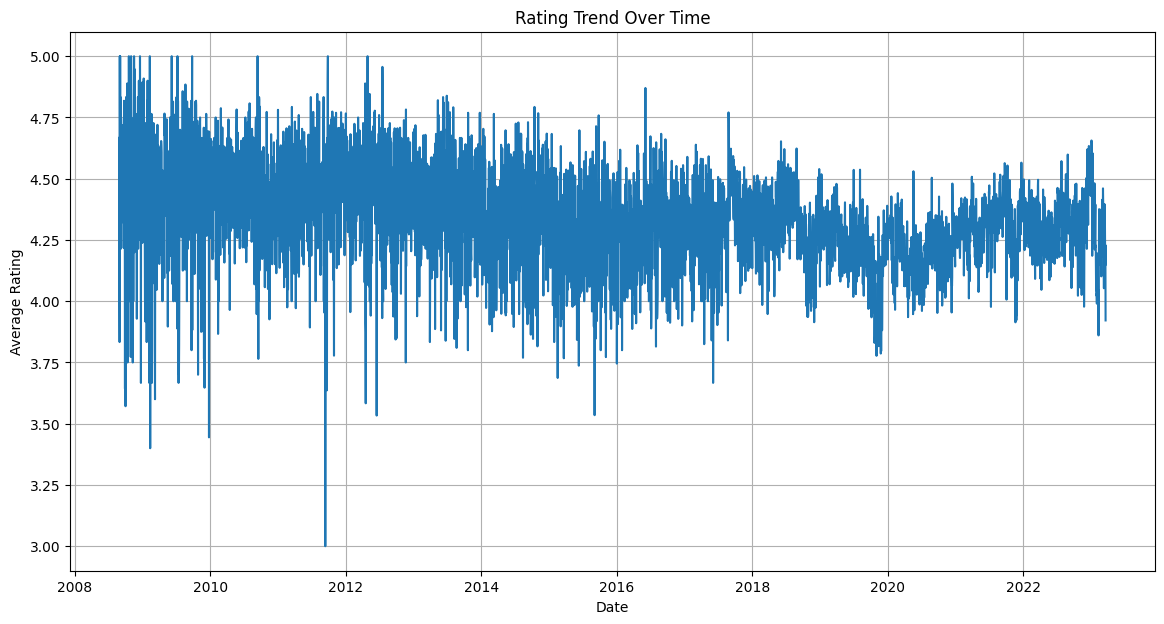

In [ ]:
plt.figure(figsize=(14, 7))
rating_trend.plot(kind='line')
plt.title('Rating Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()